In [1]:
import pandas as pd
import numpy as np

In [2]:
column_names = ['TPR','TNR','FPR','FNR','AUC','G-Mean','F1', 'G-Measure']
report = pd.DataFrame(columns = column_names)
columns = ['id',
 #'Nombre',
 'Año',
 'Kilometros',
 'Combustible',
 'Mano',
 'Consumo',
 'Motor_CC',
 'Potencia',
 'Asientos',
 'Descuento',
 'Precio_cat']
columns_test = ['id',
 #'Nombre',
 'Año',
 'Kilometros',
 'Combustible',
 'Mano',
 'Consumo',
 'Motor_CC',
 'Potencia',
 'Asientos',
 'Descuento']
seed = 2232527064

In [3]:
import math

def cmdata_report(cm, classifier, data):# add a df as parameter
    total = cm.sum()
    TP = cm[0,0]
    FN = cm[0,1]
    FP = cm[1,0]
    TN = cm[1,1]
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    FPR = FP/(FP+TN)
    FNR = FN/(FN+TP)
    ratio = (cm[0,0]+cm[1,1])/total
    PPV = TP/(TP+FP)
    AUC = (1 + TPR - FPR)/2
    GMEAN = math.sqrt(TNR*TPR)
    F1 = 2*TP/(2*TP+FP+FN)
    GMEASURE = math.sqrt(PPV*TPR)
    
    s = pd.Series([TPR,TNR,FPR,FNR,AUC,GMEAN,F1,GMEASURE], name=classifier, index=report.columns)
    df = data.append(s)
    return df

In [4]:
def get_classification_report(y_test, y_pred):
    from sklearn import metrics
    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    df_classification_report = df_classification_report.sort_values(by=['f1-score'], ascending=False)
    return df_classification_report

In [5]:
train = pd.read_csv("../csv/train.csv", na_values='?')
test = pd.read_csv("../csv/test.csv", na_values='?')

In [6]:
train.head()

id                           Nombre Ciudad     Año  Kilometros  \
0  1.0           Maruti Swift Dzire ZDI      G  2012.0     83000.0   
1  2.0      Maruti Wagon R LXI Optional      I  2016.0      4800.0   
2  3.0  Mahindra KUV 100 mFALCON D75 K8      F  2016.0     26000.0   
3  4.0            Hyundai i20 1.2 Magna      E  2013.0     56127.0   
4  5.0         Honda Jazz 1.2 SV i VTEC      H  2017.0     41981.0   

  Combustible Tipo_marchas   Mano     Consumo Motor_CC   Potencia  Asientos  \
0      Diesel       Manual  First   23.4 kmpl  1248 CC     74 bhp       5.0   
1      Petrol       Manual  First  20.51 kmpl   998 CC  67.04 bhp       5.0   
2      Diesel       Manual  First  25.32 kmpl  1198 CC     77 bhp       6.0   
3      Petrol       Manual  First   18.5 kmpl  1197 CC     80 bhp       5.0   
4      Petrol       Manual  First   18.7 kmpl  1199 CC   88.7 bhp       5.0   

   Descuento  Precio_cat  
0        NaN           3  
1        NaN           3  
2        NaN           3  
3        NaN           3  
4        NaN           3

In [7]:
'''rows = train.Nombre.tolist()
marcas = []
r = 0
for i in rows:
    if (type(i) == str):
        #print(i.split(' ', 1)[0])
        #marcas.append(i.split(' ', 1)[0])
        train.at[r,'Nombre'] = i.split(' ', 1)[0]
        r += 1
train.head()'''

"rows = train.Nombre.tolist()\nmarcas = []\nr = 0\nfor i in rows:\n    if (type(i) == str):\n        #print(i.split(' ', 1)[0])\n        #marcas.append(i.split(' ', 1)[0])\n        train.at[r,'Nombre'] = i.split(' ', 1)[0]\n        r += 1\ntrain.head()"

In [8]:
train.head()

id                           Nombre Ciudad     Año  Kilometros  \
0  1.0           Maruti Swift Dzire ZDI      G  2012.0     83000.0   
1  2.0      Maruti Wagon R LXI Optional      I  2016.0      4800.0   
2  3.0  Mahindra KUV 100 mFALCON D75 K8      F  2016.0     26000.0   
3  4.0            Hyundai i20 1.2 Magna      E  2013.0     56127.0   
4  5.0         Honda Jazz 1.2 SV i VTEC      H  2017.0     41981.0   

  Combustible Tipo_marchas   Mano     Consumo Motor_CC   Potencia  Asientos  \
0      Diesel       Manual  First   23.4 kmpl  1248 CC     74 bhp       5.0   
1      Petrol       Manual  First  20.51 kmpl   998 CC  67.04 bhp       5.0   
2      Diesel       Manual  First  25.32 kmpl  1198 CC     77 bhp       6.0   
3      Petrol       Manual  First   18.5 kmpl  1197 CC     80 bhp       5.0   
4      Petrol       Manual  First   18.7 kmpl  1199 CC   88.7 bhp       5.0   

   Descuento  Precio_cat  
0        NaN           3  
1        NaN           3  
2        NaN           3  
3        NaN           3  
4        NaN           3

In [9]:
train = train[columns].copy()
test = test[columns_test].copy()
print(test.shape)

(1159, 10)


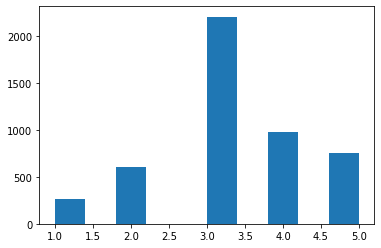

Class: 3, ocurrences: 2211 -> 45.88088815106869%
Class: 4, ocurrences: 978 -> 20.29466694334924%
Class: 5, ocurrences: 759 -> 15.750155633948951%
Class: 2, ocurrences: 602 -> 12.492218302552397%
Class: 1, ocurrences: 269 -> 5.582070969080722%


In [10]:
import matplotlib.pyplot as plt

plt.hist(train['Precio_cat'])
plt.show()

classes = train['Precio_cat'].value_counts(ascending=False)
total = classes.sum()
for i in range(classes.size):
    print("Class: "+str(classes.index[i])+", ocurrences: "+str(classes.iloc[i])+" -> "+str((classes.iloc[i]/total)*100)+"%")

initial_n = len(train['Precio_cat'].index)

In [11]:
cols = train.columns.tolist()
print(cols)

['id', 'Año', 'Kilometros', 'Combustible', 'Mano', 'Consumo', 'Motor_CC', 'Potencia', 'Asientos', 'Descuento', 'Precio_cat']


In [12]:
cols = train.columns.tolist()
for i in cols:
    print(i)
    print(train[i].unique())

id
[1.000e+00 2.000e+00 3.000e+00 ... 4.817e+03 4.818e+03 4.819e+03]
Año
[2012. 2016. 2013. 2017. 2009. 2014. 2011. 2015. 2008. 2010. 2018. 2006.
   nan 2019. 2005. 2007. 2003. 2004. 2001. 1998. 2002. 2000. 1999.]
Kilometros
[83000.  4800. 26000. ... 60033. 40158. 65743.]
Combustible
['Diesel' 'Petrol' nan 'CNG' 'LPG' 'Electric']
Mano
['First' 'Second' 'Third' nan 'Fourth & Above']
Consumo
['23.4 kmpl' '20.51 kmpl' '25.32 kmpl' '18.5 kmpl' '18.7 kmpl' '17.8 kmpl'
 '16.8 kmpl' '18.6 kmpl' '25.2 kmpl' '10.91 kmpl' '12.99 kmpl' '17.5 kmpl'
 '25.8 kmpl' '18.25 kmpl' '10.0 kmpl' '11.5 kmpl' '19.1 kmpl' '14.21 kmpl'
 '14.16 kmpl' '17.43 kmpl' '18.0 kmpl' '15.7 kmpl' '16.0 kmpl'
 '21.43 kmpl' '21.64 kmpl' '20.73 kmpl' '14.0 kmpl' '17.9 kmpl'
 '28.4 kmpl' '15.96 kmpl' nan '23.65 kmpl' '20.36 kmpl' '21.9 kmpl'
 '22.95 kmpl' '23.59 kmpl' '17.57 kmpl' '21.27 kmpl' '17.3 kmpl'
 '22.32 kmpl' '18.9 kmpl' '24.7 kmpl' '24.0 kmpl' '11.0 kmpl' '13.0 kmpl'
 '16.47 kmpl' '17.21 kmpl' '13.6 kmpl' '26.59 km

In [13]:
train.head()

id     Año  Kilometros Combustible   Mano     Consumo Motor_CC   Potencia  \
0  1.0  2012.0     83000.0      Diesel  First   23.4 kmpl  1248 CC     74 bhp   
1  2.0  2016.0      4800.0      Petrol  First  20.51 kmpl   998 CC  67.04 bhp   
2  3.0  2016.0     26000.0      Diesel  First  25.32 kmpl  1198 CC     77 bhp   
3  4.0  2013.0     56127.0      Petrol  First   18.5 kmpl  1197 CC     80 bhp   
4  5.0  2017.0     41981.0      Petrol  First   18.7 kmpl  1199 CC   88.7 bhp   

   Asientos  Descuento  Precio_cat  
0       5.0        NaN           3  
1       5.0        NaN           3  
2       6.0        NaN           3  
3       5.0        NaN           3  
4       5.0        NaN           3

# Preprocessing data

First of all, we get all numbers from string format

In [14]:
train['Descuento'] = train['Descuento'].fillna(0)
test['Descuento'] = test['Descuento'].fillna(0)

train['Combustible'].fillna(value=train['Combustible'].value_counts().index[0],inplace =True)
train['Mano'].fillna(value=train['Mano'].value_counts().index[0],inplace =True)
#train['Nombre'].fillna(value=train['Nombre'].value_counts().index[0],inplace =True)

In [15]:
train['Combustible'].value_counts(dropna=False)

Diesel      2618
Petrol      2151
CNG           42
LPG            7
Electric       1
Name: Combustible, dtype: int64

In [16]:
import re
import math

for index, row in train.iterrows():
    #print(row.Consumo)
    consumo = row.Consumo
    motor = row.Motor_CC
    potencia = row.Potencia
    
    if type(consumo) == str:
        train.loc[index,'Consumo'] = float(re.findall(r"^\d+\.\d+", consumo)[0])
    if type(motor) == str:
        train.loc[index,'Motor_CC'] = float(re.findall(r"^\d+", motor)[0])
    if type(potencia) == str:
        train.loc[index,'Potencia'] = float(re.findall(r"^\d+", potencia)[0])
        
for index, row in test.iterrows():
    #print(row.Consumo)
    consumo = row.Consumo
    motor = row.Motor_CC
    potencia = row.Potencia
    
    if type(consumo) == str:
        test.loc[index,'Consumo'] = float(re.findall(r"^\d+\.\d+", consumo)[0])
    if type(motor) == str:
        test.loc[index,'Motor_CC'] = float(re.findall(r"^\d+", motor)[0])
    if type(potencia) == str:
        test.loc[index,'Potencia'] = float(re.findall(r"^\d+", potencia)[0])
        
train['Consumo'] = train['Consumo'].astype(float)
train['Motor_CC'] = train['Motor_CC'].astype(float)
train['Potencia'] = train['Potencia'].astype(float)

test['Consumo'] = test['Consumo'].astype(float)
test['Motor_CC'] = test['Motor_CC'].astype(float)
test['Potencia'] = test['Potencia'].astype(float)

train.head()

id     Año  Kilometros Combustible   Mano  Consumo  Motor_CC  Potencia  \
0  1.0  2012.0     83000.0      Diesel  First    23.40    1248.0      74.0   
1  2.0  2016.0      4800.0      Petrol  First    20.51     998.0      67.0   
2  3.0  2016.0     26000.0      Diesel  First    25.32    1198.0      77.0   
3  4.0  2013.0     56127.0      Petrol  First    18.50    1197.0      80.0   
4  5.0  2017.0     41981.0      Petrol  First    18.70    1199.0      88.0   

   Asientos  Descuento  Precio_cat  
0       5.0        0.0           3  
1       5.0        0.0           3  
2       6.0        0.0           3  
3       5.0        0.0           3  
4       5.0        0.0           3

In [17]:
from sklearn import preprocessing
le_combustible = preprocessing.LabelEncoder()
le_mano = preprocessing.LabelEncoder()

data = train.copy()
#data_without_nan = data_without_nan.dropna()
data['Combustible'] = le_combustible.fit_transform(data['Combustible'])
data['Mano'] = le_mano.fit_transform(data['Mano'])
#data['Nombre'] = le_mano.fit_transform(data['Nombre'])

cols1 = data.select_dtypes([np.number]).columns
cols2 = data.select_dtypes(exclude = [np.number]).columns
data[cols1] = data[cols1].fillna(data[cols1].mean())
data[cols2] = data[cols2].fillna(data[cols2].mode().iloc[0])

test['Combustible'] = le_combustible.fit_transform(test['Combustible'])
test['Mano'] = le_mano.fit_transform(test['Mano'])
#test['Nombre'] = le_mano.fit_transform(test['Nombre'])

In [18]:
data.head()

id     Año  Kilometros  Combustible  Mano  Consumo  Motor_CC  Potencia  \
0  1.0  2012.0     83000.0            1     0    23.40    1248.0      74.0   
1  2.0  2016.0      4800.0            4     0    20.51     998.0      67.0   
2  3.0  2016.0     26000.0            1     0    25.32    1198.0      77.0   
3  4.0  2013.0     56127.0            4     0    18.50    1197.0      80.0   
4  5.0  2017.0     41981.0            4     0    18.70    1199.0      88.0   

   Asientos  Descuento  Precio_cat  
0       5.0        0.0           3  
1       5.0        0.0           3  
2       6.0        0.0           3  
3       5.0        0.0           3  
4       5.0        0.0           3

In [19]:
cols = data.columns.tolist()
for i in cols:
    print(i)
    print(data[i].unique())

id
[1.000e+00 2.000e+00 3.000e+00 ... 4.817e+03 4.818e+03 4.819e+03]
Año
[2012.         2016.         2013.         2017.         2009.
 2014.         2011.         2015.         2008.         2010.
 2018.         2006.         2013.57109754 2019.         2005.
 2007.         2003.         2004.         2001.         1998.
 2002.         2000.         1999.        ]
Kilometros
[83000.  4800. 26000. ... 60033. 40158. 65743.]
Combustible
[1 4 0 3 2]
Mano
[0 2 3 1]
Consumo
[23.4        20.51       25.32       18.5        18.7        17.8
 16.8        18.6        25.2        10.91       12.99       17.5
 25.8        18.25       10.         11.5        19.1        14.21
 14.16       17.43       18.         15.7        16.         21.43
 21.64       20.73       14.         17.9        28.4        15.96
 18.25417615 23.65       20.36       21.9        22.95       23.59
 17.57       21.27       17.3        22.32       18.9        24.7
 24.         11.         13.         16.47       17.21     

# erase all missing data

In [20]:
#data_without_nan = data_without_nan.drop('Tipo_marchas', axis=1).drop('Nombre', axis=1).drop('id', axis=1).drop('Ciudad', axis=1)
test_id = test.id
#test = test.drop('Tipo_marchas', axis=1).drop('Nombre', axis=1).drop('id', axis=1).drop('Ciudad', axis=1)
#target = data.Precio_cat
data = data.drop('id', axis=1)
test = test.drop('id', axis=1)

X_ = data.drop('Precio_cat', axis=1)
y_ = data['Precio_cat']

2020-12-23 14:10:44,110:INFO:EditedNearestNeighbors: Running noise removal via EditedNearestNeighbors


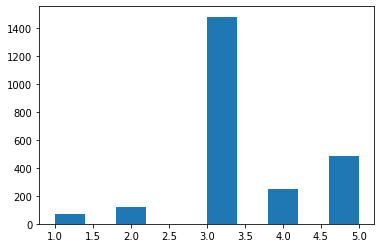

Class: 3, ocurrences: 1484 -> 61.55122355868934%
Class: 5, ocurrences: 487 -> 20.199087515553714%
Class: 4, ocurrences: 249 -> 10.327664869348819%
Class: 2, ocurrences: 121 -> 5.018664454583161%
Class: 1, ocurrences: 70 -> 2.903359601824969%


In [21]:
import smote_variants as sv

noise_filter= sv.EditedNearestNeighbors()
X, y = noise_filter.remove_noise(X_.to_numpy(), y_.to_numpy())
X = pd.DataFrame(data=X, columns=X_.columns)
y = pd.Series(y, name=y_.name)

plt.hist(y)
plt.show()

classes = y.value_counts(ascending=False)
total = classes.sum()
for i in range(classes.size):
    print("Class: "+str(classes.index[i])+", ocurrences: "+str(classes.iloc[i])+" -> "+str((classes.iloc[i]/total)*100)+"%")
noise_n = len(y.index)


In [22]:
#oversampler = sv.V_SYNTH(random_state=seed)
#oversampler = sv.MDO(random_state=seed) done
#oversampler = sv.PSO(random_state=seed)
#oversampler = sv.AMSCO(random_state=seed)
#oversampler = sv.DSRBF(random_state=seed) done
oversampler = sv.MSMOTE(random_state=seed)

#X, y = oversampler.sample(X_.to_numpy(), y_.to_numpy())

X, y = sv.MulticlassOversampling(
    oversampler=oversampler, 
    strategy='eq_1_vs_many_successive').sample(X.to_numpy(), y.to_numpy())

X = pd.DataFrame(data=X, columns=X_.columns)
y = pd.Series(y, name=y_.name)

target = y

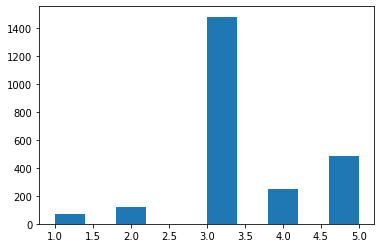

Class: 3, ocurrences: 1484 -> 61.55122355868934%
Class: 5, ocurrences: 487 -> 20.199087515553714%
Class: 4, ocurrences: 249 -> 10.327664869348819%
Class: 2, ocurrences: 121 -> 5.018664454583161%
Class: 1, ocurrences: 70 -> 2.903359601824969%


In [23]:
plt.hist(y)
plt.show()

classes = y.value_counts(ascending=False)
total = classes.sum()
for i in range(classes.size):
    print("Class: "+str(classes.index[i])+", ocurrences: "+str(classes.iloc[i])+" -> "+str((classes.iloc[i]/total)*100)+"%")

In [24]:
print("Initial instances: "+str(initial_n))
print("After noise filter: "+str(noise_n))
print("Post SMOTE-MulticlassOversampling with DSRBF: "+str(len(y.index)))

Initial instances: 4819
After noise filter: 2411
Post SMOTE-MulticlassOversampling with DSRBF: 2411


Now, train the model

In [25]:
import random
# get random seed parameter for classifiers
#random_seed = random.randrange(2**32 - 1)
#seed = random_seed
# seed used at kaggle submission
#seed = 2232527064
#print("random_seed: "+str(random_seed))
from sklearn.model_selection import StratifiedKFold
cv_ = StratifiedKFold(n_splits=5, shuffle=True)
print("Actual seed: "+str(seed))

Actual seed: 2232527064


In [26]:
import lightgbm as lgb

clf = lgb.LGBMClassifier(random_state=seed, n_jobs=-1)
#from skclean.handlers import CLNI
#clf = CLNI(classifier=clf, detector=KDN())
clf.fit(X, y)

from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(clf, X, y, cv=cv_, n_jobs=-1)

from sklearn.metrics import classification_report, confusion_matrix
rf_cmatrix = confusion_matrix(y, y_pred)
rf_report = get_classification_report(y, y_pred)
report = cmdata_report(rf_cmatrix, 'lightgbm', report)

In [27]:
cols = X.columns.tolist()
for i in cols:
    print(i)
    print(X[i].unique())

Año
[2016.         2017.         2011.         2013.         2008.
 2014.         2018.         2015.         2012.         2009.
 2013.57109754 2010.         2019.         2005.         2003.
 2007.         2006.         1998.         2001.         2002.
 2004.         1999.        ]
Kilometros
[ 4800. 26000. 41981. ... 67200. 60033. 65743.]
Combustible
[4. 1. 0. 3.]
Mano
[0. 2. 3. 1.]
Consumo
[20.51       25.32       18.7        16.8        25.2        10.91
 25.8        10.         19.1        14.21       14.16       18.6
 16.         21.43       21.64       20.73       17.9        28.4
 15.96       21.9        18.25417615 22.95       23.59       17.57
 21.27       17.3        22.32       18.9        11.         13.
 16.47       13.6        23.84       14.53       11.8        15.73
 16.12       11.5        20.45       17.1        21.76       14.42
 24.07       20.36       19.27       14.         12.07       17.
 15.87       17.01       20.77       16.02       16.6        24.
 22.9  

In [28]:
report

TPR       TNR       FPR       FNR       AUC    G-Mean  \
lightgbm  0.815385  0.793103  0.206897  0.184615  0.804244  0.804167   

                F1  G-Measure  
lightgbm  0.815385   0.815385

In [29]:
rf_report

precision    recall  f1-score      support
5              0.959596  0.975359  0.967413   487.000000
3              0.922531  0.962938  0.942301  1484.000000
accuracy       0.907092  0.907092  0.907092     0.907092
weighted avg   0.899934  0.907092  0.901785  2411.000000
4              0.836364  0.738956  0.784648   249.000000
macro avg      0.815270  0.762912  0.783853  2411.000000
1              0.768116  0.757143  0.762590    70.000000
2              0.589744  0.380165  0.462312   121.000000

And get the prediction

In [30]:
target.head()

0    3
1    3
2    3
3    3
4    3
Name: Precio_cat, dtype: int64

In [31]:
clf.fit(X, target)
prediction = clf.predict(test)

In [32]:
prediction

array([5, 3, 3, ..., 4, 5, 5])

In [33]:
test_id

0       4820
1       4821
2       4822
3       4823
4       4824
        ... 
1154    5974
1155    5975
1156    5976
1157    5977
1158    5978
Name: id, Length: 1159, dtype: int64

Get csv submission

In [34]:
submit = pd.DataFrame(columns = ['id', 'Precio_cat'])
submit['Precio_cat'] = prediction.tolist()
submit['id'] = test_id.tolist()

In [35]:
submit

id  Precio_cat
0     4820           5
1     4821           3
2     4822           3
3     4823           3
4     4824           3
...    ...         ...
1154  5974           1
1155  5975           3
1156  5976           4
1157  5977           5
1158  5978           5

[1159 rows x 2 columns]

In [38]:
submit.to_csv('submission.csv', index=False)

In [37]:
test.columns.tolist()

['Año',
 'Kilometros',
 'Combustible',
 'Mano',
 'Consumo',
 'Motor_CC',
 'Potencia',
 'Asientos',
 'Descuento']